In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [2]:
df=pd.read_csv("suicide_rates_overview_1985_to_2016.csv")

In [3]:
print (('The data has the following shape'), df.shape)
print ("\n")
df.info()

The data has the following shape (27820, 12)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [4]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
df.drop('HDI for year', axis=1, inplace = True)

In [6]:
df.drop('country-year', axis=1, inplace = True)

- GDP gdp_for_year is an object, change to a number as may need it later.
- But first I need to remaove the ','!
- First attempt, the program didn't like the $ symbol

In [7]:
df = df.rename(columns={'gdp_per_capita ($)': 'gdp_capita', ' gdp_for_year ($) ':'gdp_year', 'suicides/100k pop': 'suicides_100k'})
df.head()

,country,year,sex,age,suicides_no,population,suicides_100k,gdp_year,gdp_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [8]:
for k in list(df):
    df[k]=pd.to_numeric(df[k], errors='ignore')
df.dtypes
# ref: https://stackoverflow.com/questions/47393134/attributeerror-dataframe-object-has-no-attribute-infer-objects/48338734#48338734

country           object
year               int64
sex               object
age               object
suicides_no        int64
population         int64
suicides_100k    float64
gdp_year          object
gdp_capita         int64
generation        object
dtype: object

In [9]:
df.describe()

,year,suicides_no,population,suicides_100k,gdp_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


### In this data frame, we have the following entries
- country¶
- year from 
- sex: Male or female
- age:
- suicides_no
- population
- suicides/100k pop
- country-year
- HDI for year: *The Human Development Index (HDI) is a statistic composite index of life expectancy, education, and per capita income indicators, which are used to rank countries into four tiers of human development. A country scores a higher HDI when the lifespan is higher, the education level is higher, and the gross national income GNI (PPP) per capita is higher*. **Data incomplete, therefore deleted** 
- gdp_for_year (in dollars)
- gdp_per_capita (in dollars)
- generation: Is a steriotypy of different attributes, they include 'Generation X', 'Silent', 'G.I. Generation', 'Boomers', 'Millenials', 'Generation Z'.

- I want to group the data by high, medium and low suicide rates.
- This will be done by quartiles, taken from the data describe.
- Less than 1 suicide/100k will be low, Less than 6 suicide/100k will be Moderate,
- Less than 16 suicide/100k will be Medium,Greater than 17 will be high

In [23]:
bins = [0, 10, 15, 16,]
names = ['Low', 'Medium', 'High', 'Very High',]

d = dict(enumerate(names, 1))

df['Suicide_Range'] = np.vectorize(d.get)(np.digitize(df['suicides_100k'], bins))


df

# Ref: https://stackoverflow.com/questions/49382207/how-to-map-numeric-data-into-categories-bins-in-pandas-dataframe

,country,year,sex,age,suicides_no,population,suicides_100k,gdp_year,gdp_capita,generation,SuicideRange,Suicide_Range
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent,Low,Low
6,Albania,1987,female,35-54 years,6,278800,2.15,"2,156,624,900",796,Silent,Low,Low
290,Antigua and Barbuda,1987,female,35-54 years,0,6059,0.00,"337,174,852",5595,Silent,Low,Low
296,Antigua and Barbuda,1987,male,35-54 years,0,5927,0.00,"337,174,852",5595,Silent,Low,Low
614,Argentina,1987,male,35-54 years,482,3409100,14.14,"111,106,191,358",4026,Silent,medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
26507,United Kingdom,1987,female,35-54 years,417,6986157,5.97,"745,162,608,269",13996,Silent,Low,Low
26875,United States,1987,male,35-54 years,6569,28222000,23.28,"4,870,217,000,000",21631,Silent,Very High,Very High
26877,United States,1987,female,35-54 years,2270,29359000,7.73,"4,870,217,000,000",21631,Silent,Low,Low
27246,Uruguay,1987,male,35-54 years,59,341200,17.29,"7,367,494,080",2651,Silent,Very High,Very High


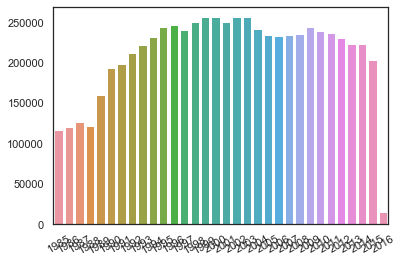

In [11]:
# Check what year had the highest number of suicides
suicides_year = []

for y in df['year'].unique():
    suicides_year.append(sum(df[df['year'] == y]['suicides_no']))

plt.xticks(rotation=30)
sns.barplot(x = df['year'].unique(), y = suicides_year)

In [12]:
# Can't distinguish by bar-chart
suicides_year = []

for y in df['year'].unique():
    suicides_year.append(sum(df[df['year'] == y]['suicides_no']))
    
suicides_year = pd.DataFrame(suicides_year, columns=['suicides_no'])
suicides_year['year'] = df['year'].unique()
suicides_year.head()

,suicides_no,year
0,126842,1987
1,121026,1988
2,160244,1989
3,211473,1992
4,221565,1993


In [13]:
# 1987 has the highset number of suicided, so I will focus on this year
df = df[df.year == 1987]
df.head()

,country,year,sex,age,suicides_no,population,suicides_100k,gdp_year,gdp_capita,generation,SuicideRange
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X,Low
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent,Low
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X,Low
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation,Low
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers,Low


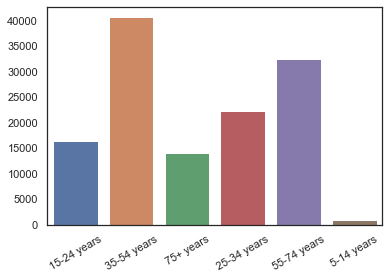

In [14]:
# New I will focus on the age category

suicides_no_age = []

for a in df['age'].unique():
    suicides_no_age.append(sum(df[df['age'] == a]['suicides_no']))

plt.xticks(rotation=30)
sns.barplot(x = df['age'].unique(), y = suicides_no_age)

- The vast majprity of suicides is in the 35 - 54 age category
- This research will now focus on that age category

In [15]:
df = df[df.age == '35-54 years']
df.head()
 

,country,year,sex,age,suicides_no,population,suicides_100k,gdp_year,gdp_capita,generation,SuicideRange
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent,Low
6,Albania,1987,female,35-54 years,6,278800,2.15,"2,156,624,900",796,Silent,Low
290,Antigua and Barbuda,1987,female,35-54 years,0,6059,0.00,"337,174,852",5595,Silent,Low
296,Antigua and Barbuda,1987,male,35-54 years,0,5927,0.00,"337,174,852",5595,Silent,Low
614,Argentina,1987,male,35-54 years,482,3409100,14.14,"111,106,191,358",4026,Silent,medium


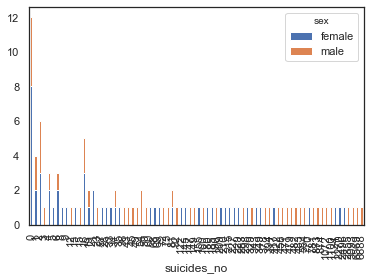

In [16]:
#I want to see if there is a difference in the male/female suicide rates
df.groupby(['suicides_no','sex']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

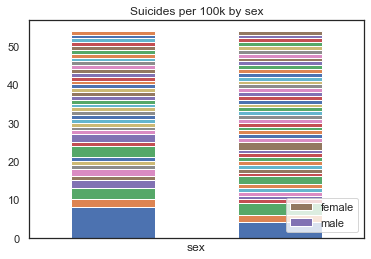

In [17]:
# The above plot is not clear
df.groupby(['sex','suicides_no']).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

plt.title('Suicides per 100k by sex')

# other it'll show up as 'dummy' 
plt.xlabel('sex')

# disable ticks in the x axis
plt.xticks([])

# fix the legend
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)

labels = reversed(df['sex'].unique())

plt.legend(reversed_handles,labels,loc='lower right')
plt.show()

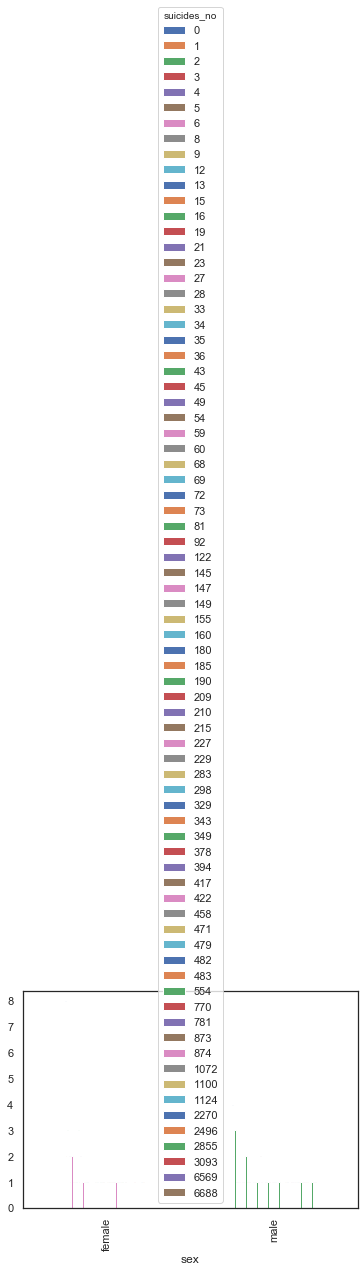

In [18]:
ax = plt.gca()
df.groupby(['sex','suicides_no']).size().unstack().plot(kind='bar',stacked=False, ax=ax)
plt.show()

- The information from these plots are not what I want. I will now split the sex column by male and female

In [19]:
dfm = df[df.sex == 'male']
dff = df[df.sex == 'female']

dfm.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 1 to 27251
Data columns (total 11 columns):
country          108 non-null object
year             108 non-null int64
sex              108 non-null object
age              108 non-null object
suicides_no      108 non-null int64
population       108 non-null int64
suicides_100k    108 non-null float64
gdp_year         108 non-null object
gdp_capita       108 non-null int64
generation       108 non-null object
SuicideRange     108 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 10.1+ KB


In [20]:
# Create a df that combines all of the values for countries

suicides_country = []

for a in df['country'].unique():
    suicides_country.append(sum(df[df['country'] == a]['suicides/100k pop']))
suicides_country = pd.DataFrame(suicides_country, columns=['suicides/100k pop'])
suicides_country
#plt.xticks(rotation=30)
#sns.barplot(x = df['counrty'].unique(), y = suicides/100k pop)

KeyError: 'suicides/100k pop'

- This research will now focus on the 35 to 54 age category
- The first will be a check to see if there is a difference between the sexse.


In [ ]:
#df.plot(x='col_name_1', y='col_name_2', style='o')

df_male = df[df.sex == 'male']
df_male
#print (df.sex == 'male')
#df_female = df[df.sex == 'female']
#df_female

#dfs=pd.DataFrame()
#df['Male']= suicides_male
#df['Female']= suicides_female

#fig, ax =plt.subplots(1,2)
#sns.countplot(df['df_male'], ax=ax[0])
#sns.countplot(df['df_female'], ax=ax[1])
#fig.show()

#for a in df:
  #  if df['sex'] == 'male':
 #   suicides_no_age.append(sum(df_f[df_f['age'] == a]['suicides_no']))

#plt.xticks(rotation=30)
#sns.barplot(x = df_f['age'].unique(), y = suicides_no_age_f)

# https://stackoverflow.com/questions/43131274/how-do-i-plot-two-countplot-graphs-side-by-side-in-seaborn
# https://github.com/HarryBitten/Suicide-Rates-Analysis/blob/master/SuiStatsCW.ipynb

# https://stackoverflow.com/questions/43131274/how-do-i-plot-two-countplot-graphs-side-by-side-in-seaborn

In [ ]:
criteria_1 = df['age'] == '35-54 years'
criteria_2 = df['sex'] == 'male'

criteria_all = criteria_1 | criteria_2
dfm = df[criteria_all]

In [ ]:
dfm.head()

In [ ]:
df.groupby('country')

In [ ]:
df1=pd.DataFrame([['a','1'],['b','2']], columns=['x','y'])
df1.dtypes

In [ ]:
df1

In [ ]:
for k in list(df1):
    df1[k]=pd.to_numeric(df1[k], errors='ignore')

In [ ]:
df1.dtypes

In [ ]:
df1